# CART - Classification and Regression Trees

# Árvores de decisão

In [1]:
using Plots
gr(size=(600,500))
default(fmt = :png)

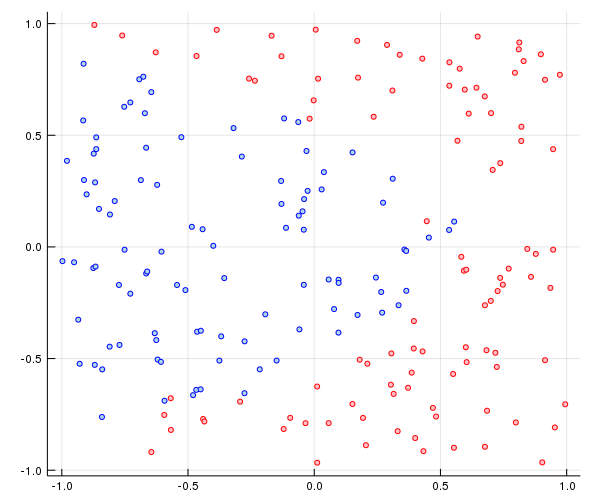

In [2]:
srand(0)
m = 200
x = sortrows(2 * rand(m, 2) .- 1)
y = [x[i,1] + 2 * x[i,2]^2 - 0.6 + randn() * 0.1 > 0 ? 1.0 : -1.0 for i = 1:m]
#y = [x[i,1] > 0 ? 1.0 : -1.0 for i = 1:m]     # Para exemplo separável
P = find(y .> 0)
N = find(y .< 0)
scatter(x[P,1], x[P,2], m=(stroke(1,:red), :pink, 3), leg=false)
scatter!(x[N,1], x[N,2], m=(stroke(1,:blue), :lightblue, 3))

HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/f8bab56051f58a127d804f67e031fc0dbf698eb3-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/f8bab56051f58a127d804f67e031fc0dbf698eb3-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

(div
  Widgets.Widget{:slider}(DataStructures.OrderedDict{Symbol,Any}(:changes=>Observables.Observable{Int64}("ob_02", 0, Any[WebIO.SyncCallback(WebIO.Scope("knockout-component-46e60779-4079-4451-b61f-42c997a37453", WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["i"], Dict{Symbol,Any}(Pair{Symbol,Any}(:className, "interact "),Pair{Symbol,Any}(:style, Dict{Any,Any}(Pair{Any,Any}(:padding, "5px 10px 0px 10px")))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"text-align:right;width:18%"))), 2), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:max, 110),Pair{Symbol,Any}(:min, 90),Pair{Symbol,Any}(:attributes, Dict{Any,Any}(Pair{Any,Any}(:type, "range"),Pair{Any,Any}(Symbol("data-bind"), "numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}"))),Pair{Symbol,Any}(:step, 1),Pair{Symbol,Any}(:className, "slider slider is-fullwidth"),Pair{Symbol,Any}(:style, Dict{Any,Any}())), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"flex-grow:1; margin: 0 2%"))), 1), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("data-bind"=>"text: displayedvalue"))), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"width:18%"))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"display:flex; justify-content:center; align-items:center;"))), 7), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("changes", (Observables.Observable{Int64}(#= circular reference @-7 =#), nothing)),Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("value", (Observables.Observable{Int64}("ob_01", 100, Any[WebIO.SyncCallback(WebIO.Scope(#= circular reference @-7 =#), WebIO.SyncCallback(WebIO.Scope(#= circular reference @-8 =#), WebIO.#37)), Observables.g]), nothing))), Set{String}(), nothing, Any["knockout"=>"/home/abel/.julia/v0.6/Knockout/src/../assets/knockout.js", "knockout_punches"=>"/home/abel/.julia/v0.6/Knockout/src/../assets/knockout_punches.js", "/home/abel/.julia/v0.6/InteractBase/src/../assets/all.js", "/home/abel/.julia/v0.6/InteractBase/src/../assets/style.css", "/home/abel/.julia/v0.6/InteractBulma/src/../assets/main.css"], Dict{Any,Any}(Pair{Any,Any}("_promises", Dict{Any,Any}(Pair{Any,Any}("importsLoaded", Any[WebIO.JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":100}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        [this[\"displayedvalue\"]=ko.computed(function () {return this.value();}
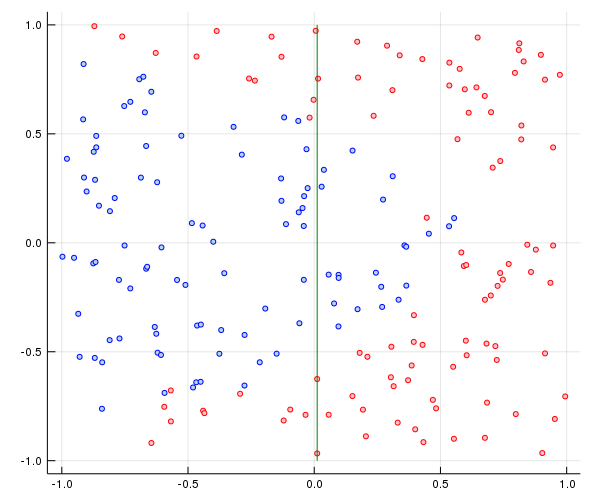
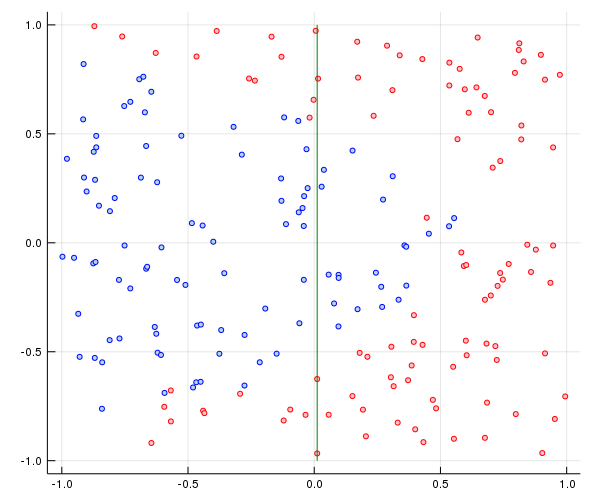

In [3]:
using Interact

@manipulate for i = div(m,2)-10:div(m,2)+10
    P = find(y .> 0)
    N = find(y .< 0)
    scatter(x[P,1], x[P,2], m=(stroke(1,:red), :pink, 3), leg=false)
    scatter!(x[N,1], x[N,2], m=(stroke(1,:blue), :lightblue, 3))
    plot!([x[i,1], x[i,1]], [-1.0; 1.0], c=:green)
end

## Medida de impureza Gini

- É uma medida da frequência com que um elemento escolhido ao acaso seja classificado incorretamente;
- Calculado somando as probabilidades $p_k$ de se escolher um item $k$ vezes a probabilidade $1 - p_k$ de erro em classificá-lo;
- Seu mínimo é zero, no caso de só termos uma classe no grupo;
- $G = \sum_{k = 1}^J p_k (1 - p_k) = 1 - \sum_{k = 1}^J p_k^2$;
- Quando fazemos uma separação, usamos a medida Gini de cada grupo multiplicada pela proporção de elementos naquele grupo.

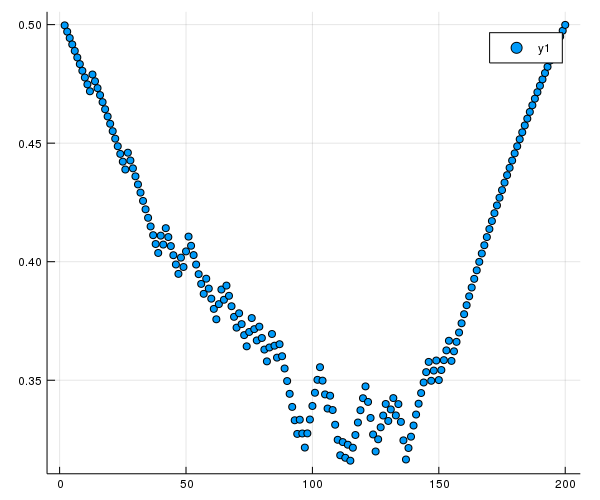

In [4]:
G = zeros(m)
for i = 1:m
    s = 0.0
    for I = [1:i-1, i:m]
        N = length(I)
        c = count(y[I] .> 0) 
        s += (1 - (c^2 + (N - c)^2) / N^2) * length(I) / (m - 1)
    end
    G[i] = s
end
scatter(1:m, G)

In [5]:
function gini(grupos, y)
    m = sum(length(I) for I in grupos)
    classes = unique(y)
    G = 0.0
    for I in grupos
        N = length(I)
        N == 0 && continue
        s = sum((count(y[I] .== c) / N)^2 for c in classes)
        G += (1 - s) * N / m
    end
    return G
end

gini (generic function with 1 method)

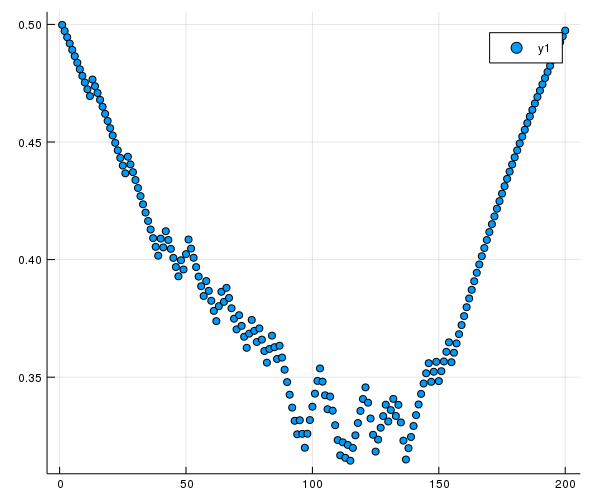

In [6]:
G = [gini([1:i-1, i:m], y) for i = 1:m]
scatter(1:m, G)

- A melhor divisão será aquela com o menor índice Gini.

In [7]:
"""`separa_grupo(grupo, x, y)`
Percorre todo os dados dados pelo `grupo` e encontra o melhor ponto de separação.
`grupo` deve ser um subconjunto de índices e `x`e `y` devem ser o conjunto completo de dados.
"""
function melhor_separacao(I, x, y)
    m, n = size(x[I,:])
    
    best_ij = (0,0) # (i,j)
    best_gini = Inf
    
    for j = 1:n # Para cada característica
        for i = I
            G_low = I[find(x[I,j] .< x[i,j])]
            G_high = setdiff(I, G_low)
            g = gini([G_low, G_high], y)
            if g < best_gini
                best_gini = g
                best_ij = (i,j)
            end
        end
    end
    
    (i,j) = best_ij
    G_low = I[find(x[I,j] .< x[i,j])]
    G_high = setdiff(I, G_low)
    
    return G_low, G_high, i, j
end

melhor_separacao

In [8]:
G_low, G_high, i, j = melhor_separacao(1:m, x, y)
i, j

(115, 1)

- Com esse valor, temos a primeira separação: Dado $\tilde{x}$, se $\tilde{x}_1 < x_1^{115}$, então ele deve olhar no conjunto `G_low`, senão no conjunto `G_high`;
- Mas qual a classe desses conjuntos? Basta olhar a classe mais frequente.

In [9]:
for (k,G) = enumerate([G_low, G_high])
    for c in unique(y)
        N = count(y[G] .== c)
        println("Classe $c no conjunto $k: $N elementos")
    end
end

Classe -1.0 no conjunto 1: 86 elementos
Classe 1.0 no conjunto 1: 28 elementos
Classe -1.0 no conjunto 2: 12 elementos
Classe 1.0 no conjunto 2: 74 elementos


Mais um nível:

In [10]:
G_low, G_high, i, j = melhor_separacao(1:m, x, y)
G_low_low, G_low_high, i2, j2 = melhor_separacao(G_low, x, y)

([19, 39, 47, 50, 62, 63, 70, 83, 86, 94, 101, 106, 111], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  103, 104, 105, 107, 108, 109, 110, 112, 113, 114], 48, 2)

In [11]:
G_low[i2]

48

In [12]:
x[i2,j2]

-0.6888911924892365

In [13]:
G_high_low, G_high_high, i3, j3 = melhor_separacao(G_high, x, y)

([115, 116, 117, 118, 119, 120, 121, 122, 123, 124  …  127, 128, 129, 130, 131, 132, 133, 134, 135, 136], [137, 138, 139, 140, 141, 142, 143, 144, 145, 146  …  191, 192, 193, 194, 195, 196, 197, 198, 199, 200], 137, 1)

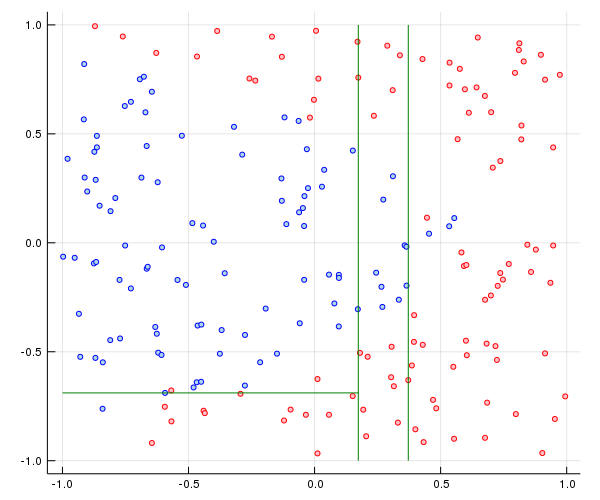

In [14]:
G_low, G_high, i, j = melhor_separacao(1:m, x, y)
G_low_low, G_low_high, i2, j2 = melhor_separacao(G_low, x, y)
G_high_low, G_high_high, i3, j3 = melhor_separacao(G_high, x, y)

P = find(y .> 0)
N = find(y .< 0)
scatter(x[P,1], x[P,2], m=(stroke(1,:red), :pink, 3), leg=false)
scatter!(x[N,1], x[N,2], m=(stroke(1,:blue), :lightblue, 3))

plot!([x[i,1], x[i,1]], [-1.0; 1.0], c=:green)           # Sabendo que j = 1
plot!([-1.0; x[i,1]], [x[i2,j2], x[i2,j2]], c=:green)    # Sabendo que j2 = 2
plot!([x[i3,1], x[i3,1]], [-1.0; 1.0], c=:green)           # Sabendo que j3 = 1

- Ok, mas agora queremos avançar mais um nível. Em cada subconjunto encontrado, melhorar a separação;
- Pra qual subconjunto devemos ir?
- Como guardar essa informação?
- Como prever um ponto novo?

## Criaremos uma estrutura

In [15]:
mutable struct Noh
    caracteristica :: Int  # Qual coluna de x ?
    valor          :: Real # Qual valor define < e ≥ ?
    
    # os grupos podem ser outros nós (Noh) ou vetores determinando o grupo final
    low          :: Union{Noh,AbstractVector}
    high         :: Union{Noh,AbstractVector}
end

Com essa estrutura podemos definir que uma árvore seja, por exemplo...

In [16]:
G_low, G_high, i, j = melhor_separacao(1:m, x, y)
G_low_low, G_low_high, i2, j2 = melhor_separacao(G_low, x, y)
G_high_low, G_high_high, i3, j3 = melhor_separacao(G_high, x, y)

arvore = Noh(j, x[i,j],
            Noh(j2, x[i2,j2], G_low_low, G_low_high),
            Noh(j3, x[i3,j3], G_high_low, G_high_high))

Noh(1, 0.17342487927953742, Noh(2, -0.6888911924892365, [19, 39, 47, 50, 62, 63, 70, 83, 86, 94, 101, 106, 111], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  103, 104, 105, 107, 108, 109, 110, 112, 113, 114]), Noh(1, 0.3717320430661659, [115, 116, 117, 118, 119, 120, 121, 122, 123, 124  …  127, 128, 129, 130, 131, 132, 133, 134, 135, 136], [137, 138, 139, 140, 141, 142, 143, 144, 145, 146  …  191, 192, 193, 194, 195, 196, 197, 198, 199, 200]))

In [17]:
# Funções para "descer" a árvore e prever o valor de um indivíduo novo
function predict(grupo :: AbstractVector, y, xtilde = [])
    # Neste caso, estamos num grupo, basta avaliar o número de indivíduos nas classes e pegar o mais frequente
    classes = unique(y)
    C = [count(y[grupo] .== c) for c in classes]
    return classes[indmax(C)]
end

function predict(noh :: Noh, y, xtilde)
    # Neste caso, estamos num nó, e uma decisão deve ser feita
    j = noh.caracteristica
    if xtilde[j] < noh.valor
        return predict(noh.low, y, xtilde)
    else
        return predict(noh.high, y, xtilde)
    end
end

predict (generic function with 3 methods)

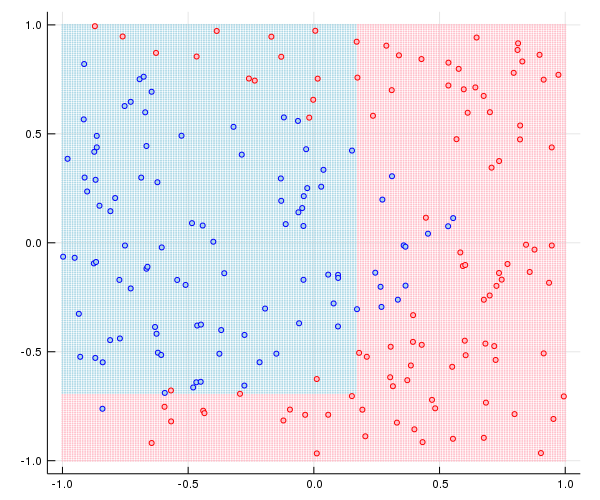

In [18]:
n_mesh = 200
mesh = zeros(Int, n_mesh, n_mesh)
t = linspace(-1, 1, n_mesh)
scatter()
for (i,c1) = enumerate(t), (j,c2) = enumerate(t)
    mesh[i,j] = predict(arvore, y, [c1; c2])
end
P = find(mesh .> 0)
N = find(mesh .< 0)
scatter!(t[(P.-1).%n_mesh.+1], t[div.(P.-1,n_mesh).+1], c=:pink, ms=2, m=(stroke(0)))
scatter!(t[(N.-1).%n_mesh.+1], t[div.(N.-1,n_mesh).+1], c=:lightblue, ms=2, m=(stroke(0)))
P = find(y .> 0)
N = find(y .< 0)
scatter!(x[P,1], x[P,2], m=(stroke(1,:red), :pink, 3), leg=false)
scatter!(x[N,1], x[N,2], m=(stroke(1,:blue), :lightblue, 3))

In [19]:
function plot_in_box(arvore, x1min, x1max, x2min, x2max, y)
    if isa(arvore, AbstractArray)
        P = count(y[arvore] .> 0)
        N = count(y[arvore] .< 0)
        cor = P > N ? :red : :blue
        #plot!([x1min, x1max], [x2min, x2max], c=cor)
        #plot!([x1max, x1min], [x2min, x2max], c=cor)
    else
        j = arvore.caracteristica
        v = arvore.valor
        if j == 1
            plot!([v, v], [x2min, x2max], c=:green)
            plot_in_box(arvore.low, x1min, v, x2min, x2max, y)
            plot_in_box(arvore.high, v, x1max, x2min, x2max, y)
        else
            plot!([x1min, x1max], [v, v], c=:green)
            plot_in_box(arvore.low, x1min, x1max, x2min, v, y)
            plot_in_box(arvore.high, x1min, x1max, v, x2max, y)
        end
    end
end

plot_in_box (generic function with 1 method)

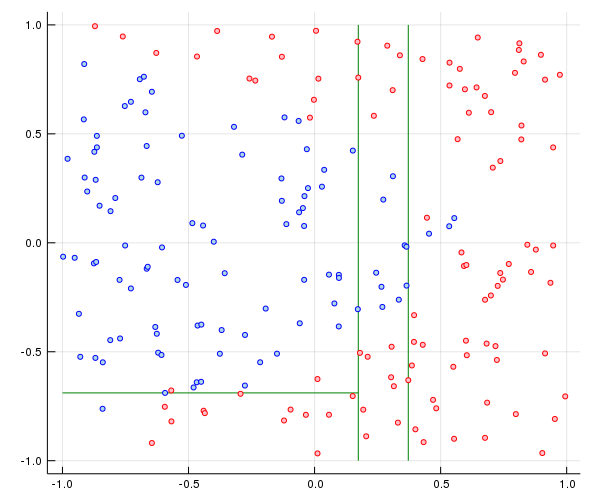

In [20]:
plot()
plot_in_box(arvore, -1.0, 1.0, -1.0, 1.0, y)
P = find(y .> 0)
N = find(y .< 0)
scatter!(x[P,1], x[P,2], m=(stroke(1,:red), :pink, 3), leg=false)
scatter!(x[N,1], x[N,2], m=(stroke(1,:blue), :lightblue, 3))

In [21]:
function separa_grupo(grupo, x, y, prof_rest)
    if prof_rest == 0
        return grupo
    end
    if gini([grupo,], y) == 0.0
        return grupo
    end
    low, high, i, j = melhor_separacao(grupo, x, y)
    noh = Noh(j, x[i,j],
            separa_grupo(low, x, y, prof_rest - 1),
            separa_grupo(high, x, y, prof_rest - 1))
    return noh
end

function cria_arvore(x, y; max_profundidade = 3)
    m, n = size(x)
    arvore = separa_grupo(1:m, x, y, max_profundidade)
end

cria_arvore (generic function with 1 method)

In [22]:
arvore = cria_arvore(x, y, max_profundidade = 30)

Noh(1, 0.17342487927953742, Noh(2, -0.6888911924892365, Noh(1, -0.6451820733536873, [19], [39, 47, 50, 62, 63, 70, 83, 86, 94, 101, 106, 111]), Noh(2, 0.6563594217237352, Noh(2, -0.5484551457189655, Noh(1, 0.011609266432943688, Noh(1, -0.4799282994619043, Noh(1, -0.5683909488954937, [48], [49]), [55, 56, 59, 72]), [100]), Noh(2, 0.5743728153338159, [1, 2, 3, 4, 5, 6, 8, 9, 10, 11  …  96, 103, 104, 105, 107, 108, 109, 110, 112, 114], Noh(1, -0.018323387122303192, [27, 30, 34, 84], [97]))), Noh(1, -0.6279051349988292, Noh(2, 0.9467866841987993, [7, 31, 33, 38], [12, 26]), [41, 57, 65, 74, 75, 78, 82, 98, 99, 102, 113]))), Noh(1, 0.3717320430661659, Noh(2, -0.29427154797549004, [116, 117, 118, 119, 126, 127, 130, 131], Noh(2, 0.582883477214863, [121, 122, 123, 124, 129, 132, 134, 135, 136], [115, 120, 125, 128, 133])), Noh(1, 0.5674520618032886, Noh(2, 0.04178248331718848, [137, 138, 139, 140, 141, 143, 144, 147, 148, 152, 153], Noh(2, 0.11507435303253155, [146, 149, 154], [142, 145, 150,

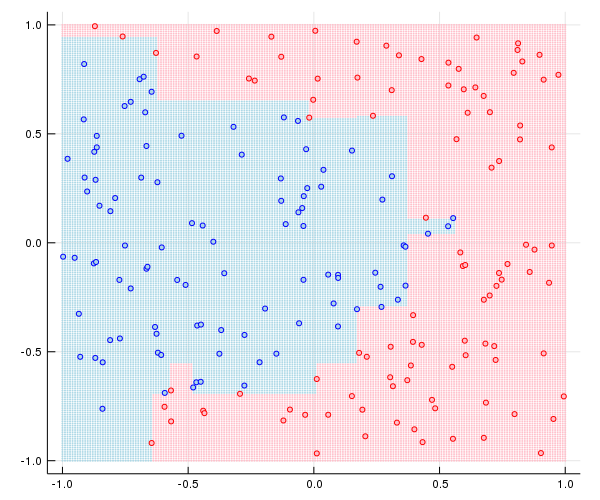

In [23]:
n_mesh = 200
mesh = zeros(Int, n_mesh, n_mesh)
t = linspace(-1, 1, n_mesh)
scatter()
for (i,c1) = enumerate(t), (j,c2) = enumerate(t)
    mesh[i,j] = predict(arvore, y, [c1; c2])
end
P = find(mesh .> 0)
N = find(mesh .< 0)
scatter!(t[(P.-1).%n_mesh.+1], t[div.(P.-1,n_mesh).+1], c=:pink, ms=2, m=(stroke(0)))
scatter!(t[(N.-1).%n_mesh.+1], t[div.(N.-1,n_mesh).+1], c=:lightblue, ms=2, m=(stroke(0)))
P = find(y .> 0)
N = find(y .< 0)
scatter!(x[P,1], x[P,2], m=(stroke(1,:red), :pink, 3), leg=false)
scatter!(x[N,1], x[N,2], m=(stroke(1,:blue), :lightblue, 3))

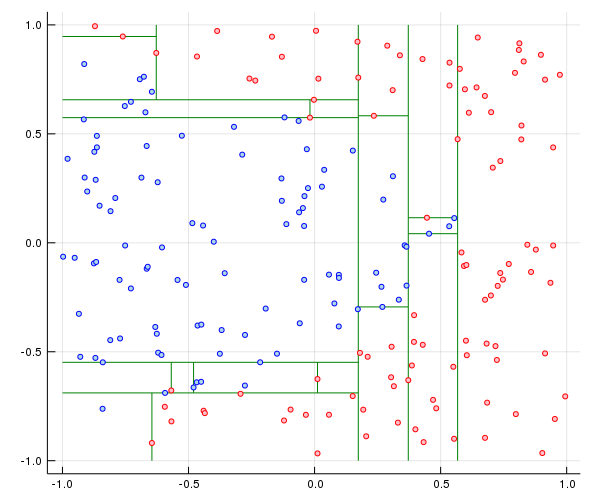

In [24]:
plot()
plot_in_box(arvore, -1.0, 1.0, -1.0, 1.0, y)
P = find(y .> 0)
N = find(y .< 0)
scatter!(x[P,1], x[P,2], m=(stroke(1,:red), :pink, 3), leg=false)
scatter!(x[N,1], x[N,2], m=(stroke(1,:blue), :lightblue, 3))

In [25]:
function resumo(arvore, y, lvl = 0)
    s = lvl > 0 ? join(fill("—", lvl-1)) * "›" : ""
    if isa(arvore, AbstractArray)
        p = predict(arvore, y)
        println(s * "Classe $p")
    else
        j, v = arvore.caracteristica, arvore.valor
        println(s * "x[$j] < $v")
        resumo(arvore.low, y, lvl + 2)
        println(s * "x[$j] ≥ $v")
        resumo(arvore.high, y, lvl + 2)
    end
end

resumo (generic function with 2 methods)

In [26]:
arvore = cria_arvore(x, y, max_profundidade=3)
resumo(arvore, y)

x[1] < 0.17342487927953742
—›x[2] < -0.6888911924892365
———›x[1] < -0.6451820733536873
—————›Classe -1.0
———›x[1] ≥ -0.6451820733536873
—————›Classe 1.0
—›x[2] ≥ -0.6888911924892365
———›x[2] < 0.6563594217237352
—————›Classe -1.0
———›x[2] ≥ 0.6563594217237352
—————›Classe 1.0
x[1] ≥ 0.17342487927953742
—›x[1] < 0.3717320430661659
———›x[2] < -0.29427154797549004
—————›Classe 1.0
———›x[2] ≥ -0.29427154797549004
—————›Classe -1.0
—›x[1] ≥ 0.3717320430661659
———›x[1] < 0.5674520618032886
—————›Classe 1.0
———›x[1] ≥ 0.5674520618032886
—————›Classe 1.0


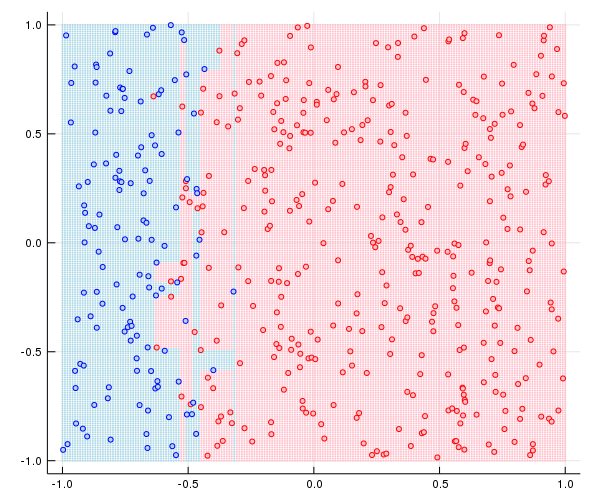

In [27]:
srand(0)
m = 500
x = sortrows(2 * rand(m, 2) .- 1)
y = [x[i,1] + 0.5 + randn() * 0.1 > 0 ? 1.0 : -1.0 for i = 1:m]
#y = [x[i,1]^2 + x[i,2]^2 - 0.5 + randn() * 0.25 > 0 ? 1.0 : -1.0 for i = 1:m]

arvore = cria_arvore(x, y, max_profundidade=30)

n_mesh = 200
mesh = zeros(Int, n_mesh, n_mesh)
t = linspace(-1, 1, n_mesh)
scatter()
for (i,c1) = enumerate(t), (j,c2) = enumerate(t)
    mesh[i,j] = predict(arvore, y, [c1; c2])
end
P = find(mesh .> 0)
N = find(mesh .< 0)
scatter!(t[(P.-1).%n_mesh.+1], t[div.(P.-1,n_mesh).+1], c=:pink, ms=2, m=(stroke(0)))
scatter!(t[(N.-1).%n_mesh.+1], t[div.(N.-1,n_mesh).+1], c=:lightblue, ms=2, m=(stroke(0)))
P = find(y .> 0)
N = find(y .< 0)
scatter!(x[P,1], x[P,2], m=(stroke(1,:red), :pink, 3), leg=false)
scatter!(x[N,1], x[N,2], m=(stroke(1,:blue), :lightblue, 3))

In [28]:
resumo(arvore, y)

x[1] < -0.45001675306496525
—›x[1] < -0.5283045980732677
———›x[1] < -0.6378632048218722
—————›Classe -1.0
———›x[1] ≥ -0.6378632048218722
—————›x[1] < -0.6317702888383905
———————›Classe 1.0
—————›x[1] ≥ -0.6317702888383905
———————›x[2] < -0.09077779820625809
—————————›x[2] < -0.4805688340231544
———————————›Classe -1.0
—————————›x[2] ≥ -0.4805688340231544
———————————›x[2] < -0.2415712156413563
—————————————›Classe 1.0
———————————›x[2] ≥ -0.2415712156413563
—————————————›x[2] < -0.17719865153616343
———————————————›Classe -1.0
—————————————›x[2] ≥ -0.17719865153616343
———————————————›Classe 1.0
———————›x[2] ≥ -0.09077779820625809
—————————›Classe -1.0
—›x[1] ≥ -0.5283045980732677
———›x[1] < -0.5075679037476433
—————›x[2] < 0.9303433360031454
———————›x[2] < -0.16554360573568205
—————————›x[1] < -0.5102389877290636
———————————›Classe 1.0
—————————›x[1] ≥ -0.5102389877290636
———————————›Classe -1.0
———————›x[2] ≥ -0.16554360573568205
—————————›Classe 1.0
—————›x[2] ≥ 0.9303433360031454
——————

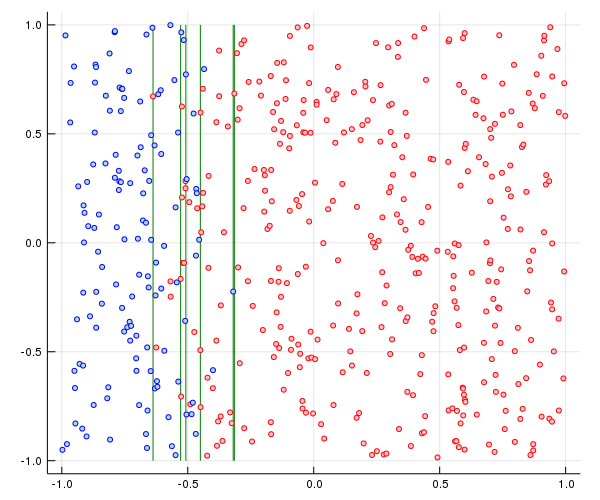

In [29]:
arvore = cria_arvore(x, y, max_profundidade=3)
plot()
plot_in_box(arvore, -1.0, 1.0, -1.0, 1.0, y)
P = find(y .> 0)
N = find(y .< 0)
scatter!(x[P,1], x[P,2], m=(stroke(1,:red), :pink, 3), leg=false)
scatter!(x[N,1], x[N,2], m=(stroke(1,:blue), :lightblue, 3))